# Spam Detection with Recurrent Neural Network Model

This problem is about classifying emails into spam or normal (or non-spam). There are 57 predictors (the first 57 columns) and the response variable (58th column) is binary denoting whether the e-mail was considered spam (1) or not (0). All predictors are quantitative and majority of them (48 out of 57) give the percentages of words in the email that match a specific key word such as “internet”, “address” or “business

**The goal is to classify an email as spam or non-spam.**

## 1. Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
    

## 2. Data Importation

In [2]:
data = pd.read_csv('spamTrain.csv')

In [3]:
data.V58 = pd.Categorical(data.V58)

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
4,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1


In [5]:
data.shape

(3068, 58)

## 3. Data Exploration

### 3.1 Descriptive statistics

In [6]:
pd.set_option('display.precision', 3)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)
data.iloc[:,:57].describe()

,V1,V2,V3,V4,...,V54,V55,V56,V57
count,3068.000,3068.000,3068.000,3068.000,...,3068.000,3068.000,3068.000,3068.000
mean,0.105,0.193,0.280,0.066,...,0.041,5.005,52.551,290.912
std,0.305,1.217,0.509,1.446,...,0.286,28.883,218.982,664.419
min,0.000,0.000,0.000,0.000,...,0.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,0.000,...,0.000,1.580,6.000,35.000
50%,0.000,0.000,0.000,0.000,...,0.000,2.240,14.000,92.000
75%,0.000,0.000,0.400,0.000,...,0.000,3.631,42.000,261.250
max,4.340,14.280,5.100,42.730,...,7.407,1021.500,9989.000,15841.000


**Summary statistics for response variable**

In [7]:
data.V58.describe()

count     3068
unique       2
top          0
freq      1872
Name: V58, dtype: int64

### 3.2 Distribution of target variable

The bar graph below shows the distribution of the target variable.

In [8]:
df = [[0, 1872],
     [1,1196]]
df = pd.DataFrame(df, columns= ['Spam', 'Frequency'])

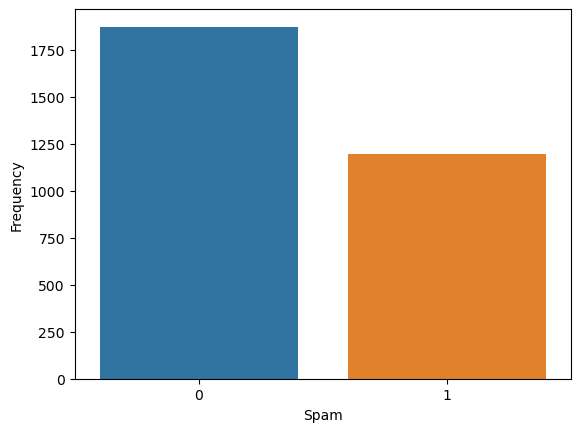

In [9]:
fg = sns.barplot(data=df, x='Spam', y='Frequency')

- The data set imbalanced where 61.4% of the emails are not spam and 38.6% are spam email.

## 4. Data Preparation

Each predictor has been transformed using the transformation function; ln(x + 0.1)

In [10]:
predictors = data.columns[:57]
for p in predictors:
    data[p] = [math.log(x + 0.1) for x in data[p]]

## 5. Splitting the data for training and testing

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data.iloc[:,:57], data.V58, random_state=123, shuffle=True, train_size=0.7, test_size=0.3)

In [12]:
Xtrain.shape

(2147, 57)

In [13]:
Xtest.shape

(921, 57)

## 6. Creating the Neural Network

This step involves configuring the Recurrent Nueral Network (RNN). The process is sequential in nature as detailed below.

In [14]:
rnn = Sequential()

### 6.1 Adding an Embedding Layer

Since the features are originally text sequences, RNN typically begin with an embedding layer that reduces dimensionality by encoding each word in amore compact dense-vector representation.

In [15]:
rnn.add(Embedding(input_dim=10000, output_dim=128))

### 6.2 Adding an LSTM Layer

A Long Short-Term Memory (LSTM) layer, makes the neural network recurrent hence allowing past information to be reinjected at a later time.

In [16]:
rnn.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout=0.2))

### 6.3 Adding a Dense Output Layer 

The Dense output layer takes the LSTM's layer's output and convert it into one result indicating whether an email is spam or not spam. Since this is a binary classification, `sigmoid` activation function is preferred.

In [17]:
rnn.add(Dense(units = 1, activation='sigmoid'))

### 6.4 Compiling the Model and Displaying the Summary

Next is model compilation and outputing its summary.

In [18]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', 
            metrics='accuracy')

The model's summary is shown below. 

In [19]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


- The model requires 259,713 parameters(weights) to be trained.

## 7. Model Training

The model is trained on the training set as shown below.

## 8. Evaluating Model on Test set

In [ ]:
rnn.evaluate(Xtest, ytest)